In [1]:
# Dica para construção do ambiente com as ferramentas necessárias para executar a biblioteca

#conda create -n cptec python=3.10

#conda activate cptec
#conda install -c conda-forge xarray matplotlib pycurl cfgrib netcdf4 pynio xarray matplotlib pycurl cfgrib netcdf4 pynio dask
#conda install -c anaconda ipykernel


In [2]:
# Import para os modelos disponiveis
# CPTEC_BAM, CPTEC_WRF, CPTEC_ETA, CPTEC_GFS

import CPTEC_BAM as BAM

In [3]:
# Durante a inicialização do construtor informações sobre os dados são exibidas
# Entre elas informações de variaveis, niveis e frequência disponiveis para consulta

bam = BAM.model()


#### The Brazilian Global Atmospheric Model (TQ0666L064 / Hybrid) #####

Forecast data available for reading between 20230108 and 20230118.

Surface variables: t2m, u10m, v10m, slp, psfc, precip
                   terrain, sbcape, sbcin, pw.
Level variables:   t, u, v, rh, g, omega.

levels (hPa): 1000  925  850  775  700  500  400  300  250
              200 150  100   70   50   30   20   10    3.

Frequency: every 6 hours [0, 6, 12, 18,...,168].



In [19]:
# Para todos modelos estão disponiveis 16 variaveis em niveis atmosféricos (hPa) e superficie
# Exemplo requisitando 2 variaveis, em 2 niveis, para a condição inicial da simulação e 1 hora de simulação

# Data da IC
date = '2023011700'

# Variaveis 
vars = ['t', 'u10m']

# Niveis
levels = [1000, 850]

# Steps = Numero de simulações futuras a partir da inicialização do modelo
steps = 1

f = bam.load(date=date, var=vars,level=levels, steps=steps)

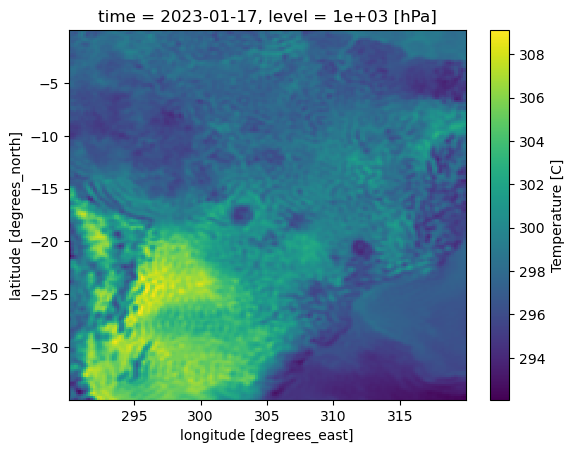

In [20]:
# Plot do campo requisitado em niveis
f.sel(time='20230117T00:00', level=1000).t.plot()

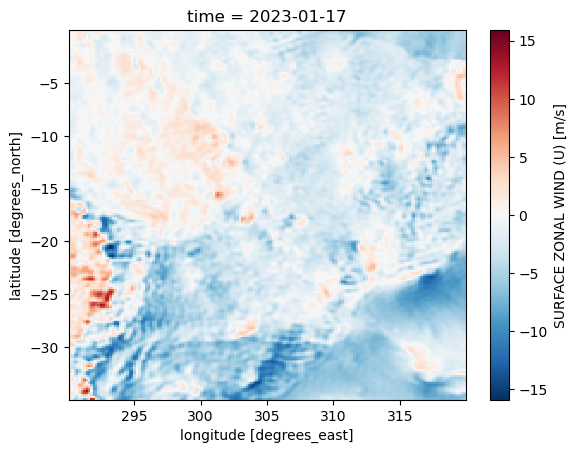

In [21]:
# Plot do campo requisitado em superficie
f.sel(time='20230117T00:00').u10m.plot()

In [22]:
# Diversas ferramentas foram implementadas neste framework para facilitar o uso
# entre elas a ferramenta que realiza durante a requisição o zoom na area desejada

# Data da IC
date = '2023011700'

# Variaveis 
vars = ['terrain']

# Recorte para AS basta altera reduce para True
bam.dict['area']['reduce'] = True

f = bam.load(date=date, var=vars, steps=1)
f

<xarray.Dataset>
Dimensions:    (latitude: 194, longitude: 166, time: 2)
Coordinates:
  * latitude   (latitude) float32 -0.09009 -0.2703 -0.4505 ... -34.68 -34.86
  * longitude  (longitude) float32 290.2 290.3 290.5 290.7 ... 319.5 319.7 319.9
  * time       (time) datetime64[ns] 2023-01-17 2023-01-17T06:00:00
Data variables:
    terrain    (time, latitude, longitude) float32 164.1 165.2 160.5 ... 0.0 0.0
Attributes:
    center:   National Institute for Space Research - INPE
    model:    The Brazilian Global Atmospheric Model (TQ0666L064 / Hybrid)

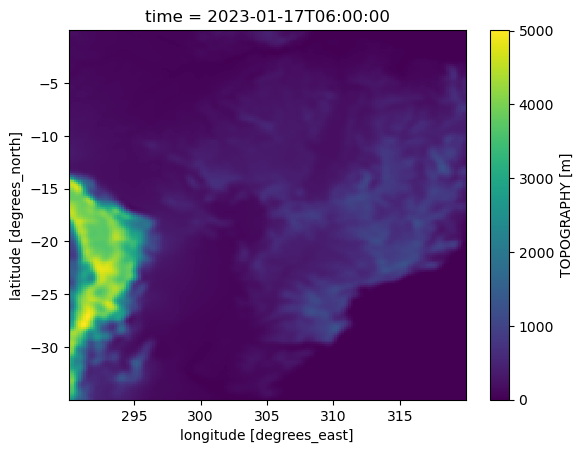

In [23]:
f.sel(time='20230117T06:00').terrain.plot()

In [24]:
# Exemplo selecionando uma area especifica

# Data da IC
date = '2023011700'

# Variaveis 
vars = ['terrain']

# Area selecionada altere reduce para true e altere os parametros de lat e lon
bam.dict['area']['reduce'] = True
bam.dict['area']['minlat'] = -35
bam.dict['area']['maxlat'] = 0
bam.dict['area']['minlon'] = 290
bam.dict['area']['maxlon'] = 320

f = bam.load(date=date, var=vars, steps=1)

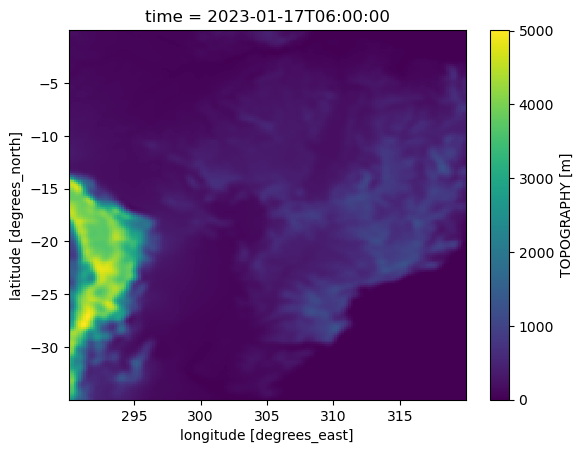

In [25]:
f.sel(time='20230117T06:00').terrain.plot()

In [26]:
# Para salvar netcdf com o resultado da requisição
f.to_netcdf('bam_2023011700.nc')

In [27]:
# Caso a ferramenta seja usada rotineiramente para aquisição de dados,
# você pode definir durante a requisição a transposição do resultado além da memoria
# para uma copia no disco rigido.

# Data da IC
date = '2023011700'

# Variaveis 
vars = ['t2m']

# Para ativar a função de escrita em disco altere para true
bam.dict['save_netcdf'] = True

# Diretorio onde serão salvas as requisições
# Por padrão, quando não aterado, um diretorio chamado INPE será criado na pasta corrente do usuario

bam.dict['path_to_save'] = '/Users/framework/'

f = bam.load(date=date, var=vars, steps=1)

In [28]:
# Durante processo de requisição dos dados são aplicadas diversas modificações nos campos,
# para que todos tenham as mesmas unidades, caso precise dos modelos em sua forma bruta use o exemplo abaixo.

# Data da IC
date = '2023011700'

# Variaveis 
vars = ['t2m']

# Apaga no construtor a função de transformação, para retornar ao funcionamento padrão execute novamente o importe e construção do objeto
bam.dict['transform'] = ''

f = bam.load(date=date, var=vars, steps=1)


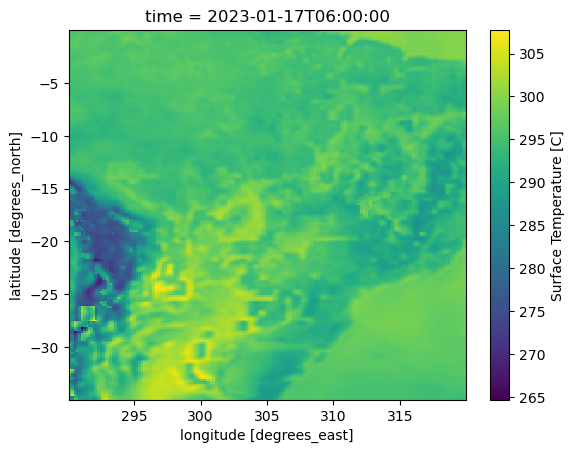

In [29]:
# Temperatura em Kelvin
f.sel(time='20230117T06:00').t2m.plot()


#### Regional (ams_08km) #####

Forecast data available for reading between 20230108 and 20230118.

Surface variables: t2m, u10m, v10m, slp, psfc, precip
                   terrain, sbcape, sbcin, pw.
Level variables:   t, u, v, rh, g, omega.

levels (hPa): 1020 1000 950 925 900 850 800 750 700 650 600 
                 550 500 450 400 350 300 250 200 150 100 50.

Frequency: hourly frequency [0,1,2,...,22,23].



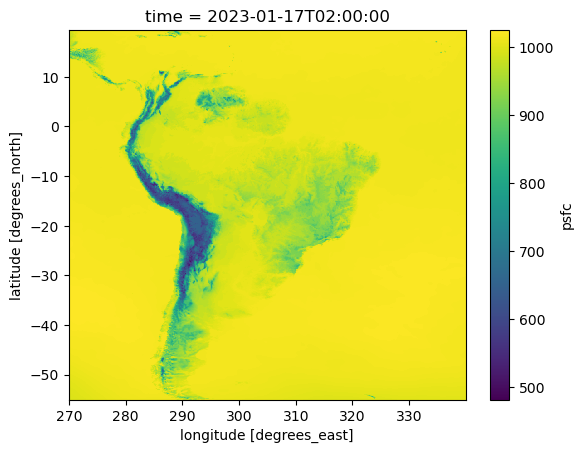

In [30]:
# Para todos modelos o funcionamento da ferramenta é idêntico, segue exemplo com o Eta.

import CPTEC_ETA as ETA

eta = ETA.model()

f = eta.load(date='2023011700', var='psfc', steps=5)
f.sel(time='20230117T02:00').psfc.plot()

In [31]:
# Quando não fornecido nenhum parametro a aplicação retornará a previsão de T2m para condição inicial do dia presente

f = eta.load()
f

<xarray.Dataset>
Dimensions:    (time: 2, latitude: 931, longitude: 875)
Coordinates:
  * time       (time) datetime64[ns] 2023-01-18 2023-01-18T01:00:00
  * latitude   (latitude) float64 -55.0 -54.92 -54.84 ... 19.24 19.32 19.4
  * longitude  (longitude) float64 270.0 270.1 270.2 270.2 ... 339.8 339.8 339.9
Data variables:
    t2m        (time, latitude, longitude) float32 6.508 6.508 ... 21.71 21.66
Attributes:
    center:   National Institute for Space Research - INPE
    model:    Eta Regional (ams_08km)

In [32]:
# Para requisitar as proximas 48 horas previstas basta modificar o steps
# Se o modelo for de 6 em 6 horas cara step terá 6 horas de diferença

f = eta.load(date='2023011700', var='t2m', steps=48)
f

<xarray.Dataset>
Dimensions:    (time: 49, latitude: 931, longitude: 875)
Coordinates:
  * time       (time) datetime64[ns] 2023-01-17 ... 2023-01-19
  * latitude   (latitude) float64 -55.0 -54.92 -54.84 ... 19.24 19.32 19.4
  * longitude  (longitude) float64 270.0 270.1 270.2 270.2 ... 339.8 339.8 339.9
Data variables:
    t2m        (time, latitude, longitude) float32 6.48 6.48 ... 21.83 21.8
Attributes:
    center:   National Institute for Space Research - INPE
    model:    Eta Regional (ams_08km)

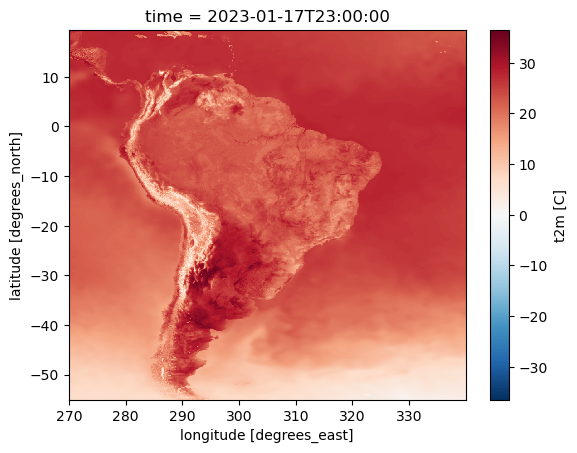

In [33]:
f.sel(time='20230117T23:00').t2m.plot()